In [48]:
# Install termcolor for colored terminal outputs
%pip install termcolor langgraph

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Import necessary libraries
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated
from termcolor import colored
from datetime import datetime, timezone
import time

In [50]:
# Define the state object for the agent graph
class AgentGraphState(TypedDict):
    start_chain: Annotated[list, add_messages]
    transcription_response: Annotated[list, add_messages]
    end_chain: Annotated[list, add_messages]


# Function to retrieve specific parts of the agent state
def get_agent_graph_state(state: AgentGraphState, state_key: str):
    if state_key == "transcription_all":
        return state["transcription_response"]
    elif state_key == "transcription_latest":
        return (
            state["transcription_response"][-1]
            if state["transcription_response"]
            else []
        )

    else:
        return None


# Initial state setup
state = {
    "start_chain": [],
    "transcription_response": [],
    "end_chain": [],
}

In [51]:
# Get the current date and time in UTC
def get_current_utc_datetime():
    now_utc = datetime.now(timezone.utc)
    return now_utc.strftime("%Y-%m-%d %H:%M:%S.%f UTC")[:-3]  # Truncate to milliseconds

In [52]:
class Agent:

    def __init__(self, state: AgentGraphState, role: str):
        self.state = state
        self.role = role

    def invoke(
        self,
    ) -> dict:
        for _ in range(3):  # Change the range as needed
            timestamp = get_current_utc_datetime()
            if self.role == "agent_node_1":
                print(colored(f"Agent {self.role}📝: {timestamp}", "cyan"))
            elif self.role == "agent_node_2":
                print(colored(f"Agent {self.role}📝: {timestamp}", "green"))
            time.sleep(5)
        return self.state

In [53]:
from langgraph.graph import StateGraph, START, END

def create_graph() -> StateGraph:
    graph = StateGraph(AgentGraphState)

    graph.add_node(
        "agent_node_1",
        lambda state: Agent(state=state, role="agent_node_1",).invoke(),
    )

    graph.add_node(
        "agent_node_2",
        lambda state: Agent(state=state, role="agent_node_2",).invoke(),
    )

    # Define the flow of the graph
    graph.add_edge(START, "agent_node_1")
    graph.add_edge(START, "agent_node_2")
    graph.add_edge("agent_node_1", END)
    graph.add_edge("agent_node_2", END)

    return graph

def compile_workflow(graph: StateGraph):
    workflow = graph.compile()
    return workflow

Graph and workflow created.


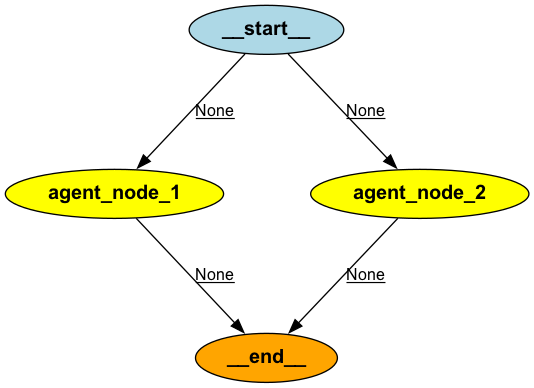

In [54]:
from IPython.display import Image, display

# Create the graph and compile the workflow
graph = create_graph()
workflow = compile_workflow(graph)
print("Graph and workflow created.")

display(Image(workflow.get_graph().draw_png()))

In [56]:
# Define workflow parameters
iterations = 10
thread = {"configurable": {"thread_id": "4"}}
verbose = True
dict_inputs = {"start_chain": "start"}
limit = {"recursion_limit": iterations}

# Execute the workflow and print state changes
async for event in workflow.astream_events(dict_inputs, version="v2"):
    if verbose:
        if event["name"] == "agent_node_1":
            print(colored(event, "cyan"))
        elif event["name"] == "agent_node_2":
            print(colored(event, "green"))
        else:
            print(colored(event, "magenta"))
    else:
        print("\n")

{'event': 'on_chain_start', 'data': {'input': {'start_chain': 'start'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '15727945-da20-4477-b30b-23430789e46a', 'metadata': {}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'start_chain': 'start'}}, 'name': '__start__', 'tags': ['graph:step:0', 'langsmith:hidden'], 'run_id': '33ab35ac-5a87-4c9f-8294-f31027d744bf', 'metadata': {'langgraph_step': 0, 'langgraph_node': '__start__', 'langgraph_triggers': ['__start__'], 'langgraph_task_idx': 0, 'thread_ts': '1ef50d41-7a3e-68d2-bffe-e422fd9b6644'}, 'parent_ids': ['15727945-da20-4477-b30b-23430789e46a']}
{'event': 'on_chain_end', 'data': {'output': {'start_chain': 'start'}, 'input': {'start_chain': 'start'}}, 'run_id': '33ab35ac-5a87-4c9f-8294-f31027d744bf', 'name': '__start__', 'tags': ['graph:step:0', 'langsmith:hidden'], 'metadata': {'langgraph_step': 0, 'langgraph_node': '__start__', 'langgraph_triggers': ['__start__'], 'langgraph_task_idx': 0, 'thread_ts': '1ef50d41-7a3e-68d2